In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import plotly.express as px

In [2]:
url = 'E:\\Dessertation\\desertion_dkit_msc_2022_sep\\output.csv'
# d parser df:=lambda x: pd.datetime.strptime(x,'gy-8m-gd gI-Sp")
df = pd.read_csv(url)
df = df.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, ignore_index=False, key=None)
# df = pd.read_csv(url)
# df['year'] = pd.to_datetime(df['year'], format='%Y%', errors='ignore')
# # Converting the index as date
# df.index = pd.to_datetime(df.index)

# df = df.index.year
# df = df.set_index('year')

# # Converting the index as date
# df.index = pd.to_datetime(df.index)
df.head()

,country,year,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_gdp,gdp_per_capita,...,physician_price,laborforcetotal,lifeexpectancy,mobilesubscriptions,refugees,selfemployed,electricityacess,continent,country_code,mobilesubscription
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,8.841667e+10,3264,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Americas,ARG,0.009469
1,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,8.841667e+10,3264,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Americas,ARG,0.009469
2,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,8.841667e+10,3264,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Americas,ARG,0.009469
3,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,8.841667e+10,3264,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Americas,ARG,0.009469
4,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,8.841667e+10,3264,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Americas,ARG,0.009469


In [3]:
df['country'].unique()

array(['Argentina', 'Armenia', 'Australia', 'Austria', 'Belgium',
       'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Croatia',
       'Cuba', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
       'Poland', 'Portugal', 'Romania', 'Russian Federation',
       'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand',
       'Turkmenistan', 'Ukraine'], dtype=object)

In [4]:
df.shape

(13276, 26)

In [5]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides', 'population',
       'sucid_in_hundredk', 'country-year', 'yearly_gdp', 'gdp_per_capita',
       'generation', 'suicides.1', 'internetusers', 'expenses',
       'employeecompensation', 'unemployment', 'physician_price',
       'laborforcetotal', 'lifeexpectancy', 'mobilesubscriptions', 'refugees',
       'selfemployed', 'electricityacess', 'continent', 'country_code',
       'mobilesubscription'],
      dtype='object')

In [6]:
countries = df.country.unique()
countries

array(['Argentina', 'Armenia', 'Australia', 'Austria', 'Belgium',
       'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Croatia',
       'Cuba', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
       'Poland', 'Portugal', 'Romania', 'Russian Federation',
       'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand',
       'Turkmenistan', 'Ukraine'], dtype=object)

In [7]:
countrynames = df['country'].unique()
countrynames

array(['Argentina', 'Armenia', 'Australia', 'Austria', 'Belgium',
       'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Croatia',
       'Cuba', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
       'Poland', 'Portugal', 'Romania', 'Russian Federation',
       'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand',
       'Turkmenistan', 'Ukraine'], dtype=object)

In [8]:
features = ['country', 'year', 'sex', 'age', 'suicides', 'population',
       'sucid_in_hundredk', 'country-year', 'yearly_gdp', 'gdp_per_capita',
       'generation', 'internetusers', 'expenses',
       'employeecompensation', 'unemployment', 'physician_price',
       'laborforcetotal', 'lifeexpectancy', 'mobilesubscriptions', 'refugees',
       'selfemployed', 'electricityacess', 'continent', 'country_code',
       'mobilesubscription']

total = df[features].groupby('country').get_group(countrynames[0]).groupby('year').mean()

total['suicides'] = df[['country', 'year', 'sucid_in_hundredk']].groupby('country').get_group(countrynames[0]).groupby('year').sum()
total['population'] = df[['country', 'year', 'population']].groupby('country').get_group(countrynames[0]).groupby('year').sum()

total['country'] = countrynames[0]

for i, x in enumerate(countrynames[1:]):
    suicides = df[features].groupby('country').get_group(x).groupby('year').mean()
    suicides['suicides'] = df[['country', 'year', 'sucid_in_hundredk']].groupby('country').get_group(x).groupby('year').sum()
    total['population'] = df[['country', 'year', 'population']].groupby('country').get_group(x).groupby('year').sum()
  
    suicides['country'] = x
    total = total.append(suicides)

total.reset_index(inplace=True)
sort = True

In [9]:
total['risk'] = total.suicides.copy()

total['risk'] = np.where(total.risk < total.suicides.mean(), 0, 1)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Suicides')

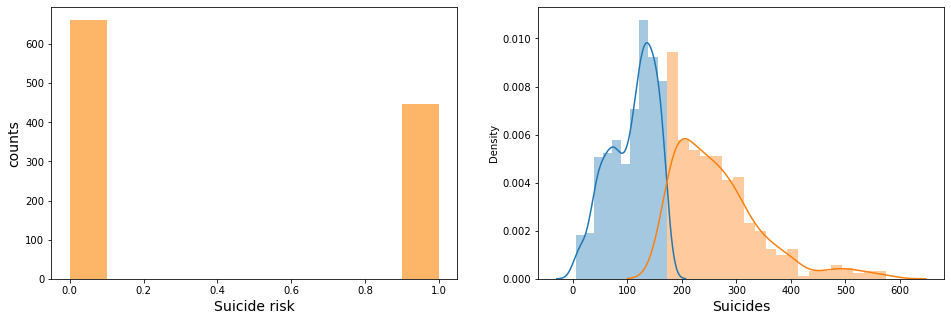

In [10]:
col = plt.cm.Spectral(np.linspace(0, 1, 20))

plt.figure(figsize=(16, 5))
plt.subplot(121)
plt.hist(total.risk, color=col[6])
plt.ylabel('counts', fontsize=14)
plt.xlabel('Suicide risk', fontsize=14)

plt.subplot(122)
sns.distplot(total.suicides[total.risk == 0], bins=10)
sns.distplot(total.suicides[total.risk == 1], bins=20)  
plt.xlabel('Suicides', fontsize=14)

In [11]:
# totalfeatures = ['country', 'year',  'suicides', 'population',
#        'sucid_in_hundredk', 'yearly_gdp', 'gdp_per_capita', 'internetusers', 'expenses',
#        'employeecompensation', 'unemployment', 'physician_price',
#        'laborforcetotal', 'lifeexpectancy', 'mobilesubscriptions', 'refugees',
#        'selfemployed', 'electricityacess',
#        'mobilesubscription']
totalfeatures = ['sucid_in_hundredk', 'yearly_gdp', 'gdp_per_capita', 'internetusers', 'expenses',
       'employeecompensation', 'unemployment','laborforcetotal', 'lifeexpectancy', 'mobilesubscriptions', 'refugees',
       'selfemployed', 'electricityacess',
       'mobilesubscription']

<ipython-input-12-1755bcf9bb97>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


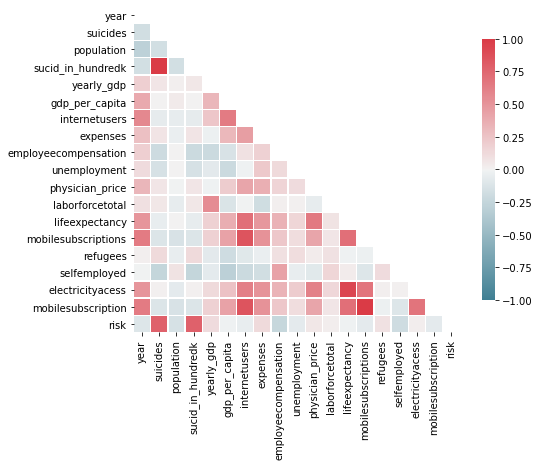

In [12]:
corr = total.corr()

# Generate a mask for the upper triangle

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=0.2, cbar_kws={"shrink": 0.8});

In [13]:
# total['risk']

In [14]:
from sklearn.preprocessing import StandardScaler
# Preparing data for modeling

X = np.asarray(total[totalfeatures])
y = np.asarray(total['risk'])


# Applying standard scaler on data, since ML algorithms work with the assumption that the data is normally distributed

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [15]:
from sklearn.model_selection import train_test_split
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=4)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (831, 14) (831,)
Test set: (277, 14) (277,)


In [16]:
import pandas as pd
import numpy as np

def clean_dataset(total):
    assert isinstance(total, pd.DataFrame), "total needs to be a pd.DataFrame"
    total.dropna(inplace=True)
    indices_to_keep = ~total.isin([np.nan, np.inf, -np.inf]).any(1)
    return total[indices_to_keep].astype(np.float64)

In [17]:
# from NumPy. If we pair this function with any(), we will check if there are any instances of NaN. We can replace the NaN values using the nan_to_num() method. Let’s look at the code and the clean data:
# print(np.any(np.isnan(X_train)))
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)
print(X_train)

[[ 2.34280113 -0.54270319 -1.04705675 ... -0.54349893  0.80394889
  -0.89169349]
 [-0.16159412 -0.50067024  0.15973437 ... -0.3760299   0.80394889
  -0.59539445]
 [-0.5246894  -0.34785803  1.59661951 ... -0.465671    0.80394889
   1.16441873]
 ...
 [-1.1019957   0.23950714 -0.66506655 ...  1.19072061  0.66389117
  -0.46055755]
 [ 0.74670113  1.04785464  0.30759654 ... -0.31904872  0.80394889
  -0.16524884]
 [-1.00648696  1.83453767 -0.4659517  ...  0.06870118  0.74662203
   1.11241251]]


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


DT = DecisionTreeClassifier(criterion="entropy", max_depth=7, max_leaf_nodes=30)
DT = DT.fit(X_train, y_train)
ydthat = DT.predict(X_test)

print('******************Decision Tree classifier**************')

print('Accuracy =', DT.score(X_test, y_test))
print('Train Accuracy=', DT.score(X_train, y_train))
print('CM\n', confusion_matrix(y_test, ydthat))
print('classification report for decision tree\n', classification_report(y_test, ydthat))
print('# of leaves', DT.get_n_leaves(), '\n Depth', DT.get_depth())


******************Decision Tree classifier**************
Accuracy = 0.9963898916967509
Train Accuracy= 1.0
CM
 [[170   0]
 [  1 106]]
classification report for decision tree
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       170
           1       1.00      0.99      1.00       107

    accuracy                           1.00       277
   macro avg       1.00      1.00      1.00       277
weighted avg       1.00      1.00      1.00       277

# of leaves 4 
 Depth 3


In [19]:


DTfeat_importance = DT.feature_importances_
DTfeat_importance = pd.DataFrame([totalfeatures, DT.feature_importances_]).T


print(DTfeat_importance.sort_values(by=1, ascending=False))
print('\n# of features= ', DT.n_features_)

                       0    1
0      sucid_in_hundredk  1.0
1             yearly_gdp  0.0
2         gdp_per_capita  0.0
3          internetusers  0.0
4               expenses  0.0
5   employeecompensation  0.0
6           unemployment  0.0
7        laborforcetotal  0.0
8         lifeexpectancy  0.0
9    mobilesubscriptions  0.0
10              refugees  0.0
11          selfemployed  0.0
12      electricityacess  0.0
13    mobilesubscription  0.0

# of features=  14
